<a href="https://colab.research.google.com/github/meenprasadjaisi/Creating-Machine-Learning-algorithms/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression:


**Introduction:**

- Supervised machine learning algorithm

- It’s used to predict values within a continuous range, (e.g. sales, price) rather than trying to classify them into categories (e.g. cat, dog)

Simple regression

y = mx + b

Multivariable regression:

f(x,y,z) = w1x + w2y + w3z

Making predictions:

y = Weight * X + Bias

where:

weight  -->  the coefficient for the independent variable. In machine learning we call coefficients weights.

X  -->  the independent variable. In machine learning we call these variables features.

Bias  -->  the intercept where our line intercepts the y-axis. In machine learning we can call intercepts bias. Bias offsets all predictions that we make.

# Cost Function:

To optimize the weight we need Cost Function.

Let’s use MSE (L2) as our cost function. MSE measures the average squared difference between an observation’s actual and predicted values. The output is a single number representing the cost, or score, associated with our current set of weights. Our goal is to minimize MSE to improve the accuracy of our model.

math:


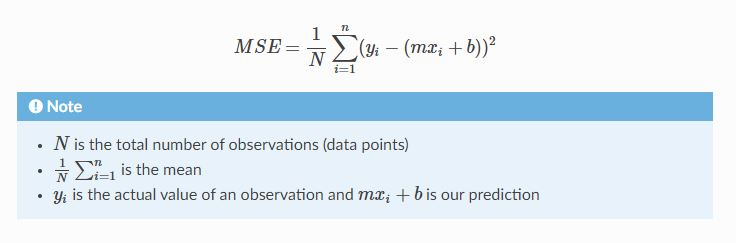

In [2]:
from IPython.display import Image
Image('/content/cost function.JPG')

# Gradient descent:

To minimize MSE we use Gradient Descent to calculate the gradient of our cost function

Gradient descent consistantly looking at the error that our weight currently gives us, using the derivative of the cost function to find the gradient (The slope of the cost function using our current weight), and then changing our weight to move in the direction opposite of the gradient.



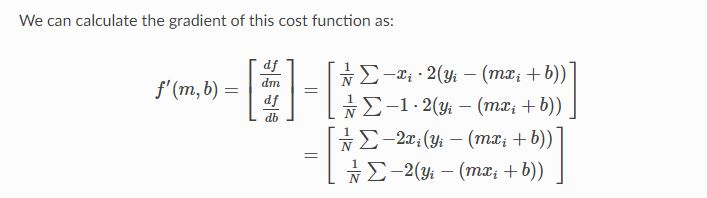

In [3]:
Image('/content/gs.JPG')

m or w  => weight

b ==> bias

# Lets Create Linear Regression Algorithm

In [18]:
import numpy as np

class LinearRegression:
  def __init__(self, learning_rate = 0.001, n_itrs = 1000):
    self.learning_rate = learning_rate
    self.n_itrs = n_itrs
    self.weight = None
    self.bias = None

  def fit(self, X, y):
    # initializing the parameters
    n_samples, n_features = X.shape
    self.weight = np.zeros(n_features)
    self.bias = 0

    for _ in range(self.n_itrs):
      # approximation
      y_prediction = np.dot(X, self.weight) + self.bias

      # gradient decent
      dw = (1/n_samples) * np.dot(X.T, (y_prediction - y))
      db = (1/n_samples) * np.sum(y_prediction - y)
      # Updating the values of weight and bias
      self.weight -= self.learning_rate * dw
      self.bias -= self.learning_rate * db

  def predict(self, X):
    y_prediction = np.dot(X, self.weight) + self.bias
    return y_prediction


In [20]:
def r2_score(y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred)
    corr = corr_matrix[0, 1]
    return corr ** 2

In [30]:
# importing the dependencies
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

def mse(y_true, y_pred):
    acc = np.mean((y_true - y_pred)**2)
    return acc
# loading the dataset
X, y = datasets.make_regression( n_samples = 100, n_features = 1, noise = 20, random_state = 4 )

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 1234 )

reg = LinearRegression(learning_rate=0.1)

reg.fit(X_train, y_train)

predictions = reg.predict(X_test)

# accuracy
print('MSE : ', mse(y_test, predictions))

print('R2 score : ', r2_score(y_test, predictions))


MSE :  305.77413162286416
R2 score :  0.9253717934621973


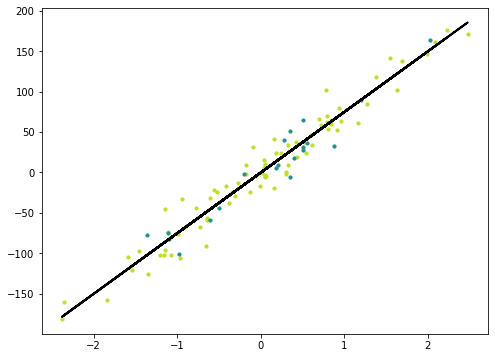

In [31]:
import matplotlib.pyplot as plt
y_pred_line = reg.predict(X)
cmap = plt.get_cmap("viridis")
fig = plt.figure(figsize=(8, 6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color="black", linewidth=2, label="Prediction")
plt.show()